# Exercise 3


In [1]:
using ITensors
using ITensorTDVP
using PyPlot
using LaTeXStrings   

We will still work with transverse field Ising model, but this time we focus on time evolution

In [2]:
function Hamiltonian(;N, J, h, alpha)

    os = OpSum()

    for n in 1:N-1
        os .+= -J, "Z", n, "Z", n+1
    end
   
    for n in 1:N
        os .+= -h*sin(alpha), "Z", n
        os .+= -h*cos(alpha), "X", n
    end
    
    return os
end

function Magnetization(;N)
    os = OpSum()

    for n in 1:N
        os .+= 1/N, "Z", n
    end

    return os
end

function Correlation(;N)
    os = OpSum()

    for n in 1:N-1
        os .+= 1/N, "Z", n, "Z", n+1 
    end
    
    return os
end

Correlation (generic function with 1 method)

## 1. TDVP 

In [3]:
N = 6
J = 0.2
h = 1.2
alpha = 0

sites = siteinds("S=1/2", N)

H = MPO(Hamiltonian(N=N, J=J, h=h, alpha=alpha), sites);

Mag = MPO(Magnetization(N=N), sites);

Corr = MPO(Correlation(N=N), sites);

In [4]:
H

MPO
[1] ((dim=3|id=818|"Link,l=1"), (dim=2|id=19|"S=1/2,Site,n=1")', (dim=2|id=19|"S=1/2,Site,n=1"))
[2] ((dim=3|id=818|"Link,l=1"), (dim=3|id=848|"Link,l=2"), (dim=2|id=825|"S=1/2,Site,n=2")', (dim=2|id=825|"S=1/2,Site,n=2"))
[3] ((dim=3|id=848|"Link,l=2"), (dim=3|id=228|"Link,l=3"), (dim=2|id=401|"S=1/2,Site,n=3")', (dim=2|id=401|"S=1/2,Site,n=3"))
[4] ((dim=3|id=228|"Link,l=3"), (dim=3|id=91|"Link,l=4"), (dim=2|id=250|"S=1/2,Site,n=4")', (dim=2|id=250|"S=1/2,Site,n=4"))
[5] ((dim=3|id=91|"Link,l=4"), (dim=3|id=368|"Link,l=5"), (dim=2|id=971|"S=1/2,Site,n=5")', (dim=2|id=971|"S=1/2,Site,n=5"))
[6] ((dim=3|id=368|"Link,l=5"), (dim=2|id=455|"S=1/2,Site,n=6")', (dim=2|id=455|"S=1/2,Site,n=6"))


In [5]:
Mag

MPO
[1] ((dim=2|id=647|"Link,l=1"), (dim=2|id=19|"S=1/2,Site,n=1")', (dim=2|id=19|"S=1/2,Site,n=1"))
[2] ((dim=2|id=647|"Link,l=1"), (dim=2|id=611|"Link,l=2"), (dim=2|id=825|"S=1/2,Site,n=2")', (dim=2|id=825|"S=1/2,Site,n=2"))
[3] ((dim=2|id=611|"Link,l=2"), (dim=2|id=143|"Link,l=3"), (dim=2|id=401|"S=1/2,Site,n=3")', (dim=2|id=401|"S=1/2,Site,n=3"))
[4] ((dim=2|id=143|"Link,l=3"), (dim=2|id=244|"Link,l=4"), (dim=2|id=250|"S=1/2,Site,n=4")', (dim=2|id=250|"S=1/2,Site,n=4"))
[5] ((dim=2|id=244|"Link,l=4"), (dim=2|id=9|"Link,l=5"), (dim=2|id=971|"S=1/2,Site,n=5")', (dim=2|id=971|"S=1/2,Site,n=5"))
[6] ((dim=2|id=9|"Link,l=5"), (dim=2|id=455|"S=1/2,Site,n=6")', (dim=2|id=455|"S=1/2,Site,n=6"))


In [6]:
Corr

MPO
[1] ((dim=3|id=511|"Link,l=1"), (dim=2|id=19|"S=1/2,Site,n=1")', (dim=2|id=19|"S=1/2,Site,n=1"))
[2] ((dim=3|id=511|"Link,l=1"), (dim=3|id=243|"Link,l=2"), (dim=2|id=825|"S=1/2,Site,n=2")', (dim=2|id=825|"S=1/2,Site,n=2"))
[3] ((dim=3|id=243|"Link,l=2"), (dim=3|id=561|"Link,l=3"), (dim=2|id=401|"S=1/2,Site,n=3")', (dim=2|id=401|"S=1/2,Site,n=3"))
[4] ((dim=3|id=561|"Link,l=3"), (dim=3|id=582|"Link,l=4"), (dim=2|id=250|"S=1/2,Site,n=4")', (dim=2|id=250|"S=1/2,Site,n=4"))
[5] ((dim=3|id=582|"Link,l=4"), (dim=3|id=321|"Link,l=5"), (dim=2|id=971|"S=1/2,Site,n=5")', (dim=2|id=971|"S=1/2,Site,n=5"))
[6] ((dim=3|id=321|"Link,l=5"), (dim=2|id=455|"S=1/2,Site,n=6")', (dim=2|id=455|"S=1/2,Site,n=6"))


In [7]:
state_list0 = ["Dn", "Up", "Up", "Up", "Up", "Dn"]
psi0 = MPS(sites, state_list0)

MPS
[1] ((dim=2|id=19|"S=1/2,Site,n=1"), (dim=1|id=869|"Link,l=1"))
[2] ((dim=1|id=869|"Link,l=1"), (dim=2|id=825|"S=1/2,Site,n=2"), (dim=1|id=703|"Link,l=2"))
[3] ((dim=1|id=703|"Link,l=2"), (dim=2|id=401|"S=1/2,Site,n=3"), (dim=1|id=909|"Link,l=3"))
[4] ((dim=1|id=909|"Link,l=3"), (dim=2|id=250|"S=1/2,Site,n=4"), (dim=1|id=91|"Link,l=4"))
[5] ((dim=1|id=91|"Link,l=4"), (dim=2|id=971|"S=1/2,Site,n=5"), (dim=1|id=314|"Link,l=5"))
[6] ((dim=1|id=314|"Link,l=5"), (dim=2|id=455|"S=1/2,Site,n=6"))


In [8]:
println("Initial energy = ", inner(psi0', H, psi0))

Initial energy = -0.2


In [9]:
maxdim = 50
total_time = 8
dt = 0.1
timesteps = convert(Int64, total_time / dt)    

println("total_time = ", total_time)
println("dt         = ", dt)
println("timesteps  = ", timesteps)
println("maxdim     = ", maxdim)    

time_list = []
overlap_list = []
Mag_list = []
Corr_list = []
E_list = []

psi = psi0

for n in 0:timesteps
    
    t = n * dt 
    
    evoT = (n == 0) ? 0 : -1im*dt

    print("step = ", n, ", time = ", round(t, digits=2), " ")

    # Use global to modify the global variable
    global psi = tdvp(
        H,
        evoT,
        psi;
        nsteps=1,
        reverse_step=true,
        normalize=false,
        maxdim=maxdim,
        cutoff=1e-12,
        outputlevel=1,
    )

    E_val = inner(psi', H, psi)
    Mag_val = inner(psi', Mag, psi)
    Corr_val = inner(psi', Corr, psi)
    
    append!(time_list, t)
    append!(E_list, E_val) 
    append!(Mag_list, Mag_val) 
    append!(Corr_list, Corr_val) 
    append!(overlap_list, inner(psi0, psi)) 


    
end

total_time = 8
dt         = 0.1
timesteps  = 80
maxdim     = 50
step = 0, time = 0.0 After sweep 1: maxlinkdim=1 maxerr=0.00E+00 current_time=0.0 time=10.561
step = 1, time = 0.1 After sweep 1: maxlinkdim=2 maxerr=4.46E-21 current_time=0.0 - 0.1im time=20.011
step = 2, time = 0.2 After sweep 1: maxlinkdim=2 maxerr=5.53E-17 current_time=0.0 - 0.1im time=0.012
step = 3, time = 0.3 After sweep 1: maxlinkdim=2 maxerr=1.10E-14 current_time=0.0 - 0.1im time=0.011
step = 4, time = 0.4 After sweep 1: maxlinkdim=2 maxerr=4.31E-13 current_time=0.0 - 0.1im time=0.015
step = 5, time = 0.5 After sweep 1: maxlinkdim=3 maxerr=1.12E-14 current_time=0.0 - 0.1im time=0.023
step = 6, time = 0.6 After sweep 1: maxlinkdim=3 maxerr=2.78E-13 current_time=0.0 - 0.1im time=0.029
step = 7, time = 0.7 After sweep 1: maxlinkdim=4 maxerr=6.56E-19 current_time=0.0 - 0.1im time=0.043
step = 8, time = 0.8 After sweep 1: maxlinkdim=4 maxerr=1.39E-17 current_time=0.0 - 0.1im time=0.046
step = 9, time = 0.9 After sweep 

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


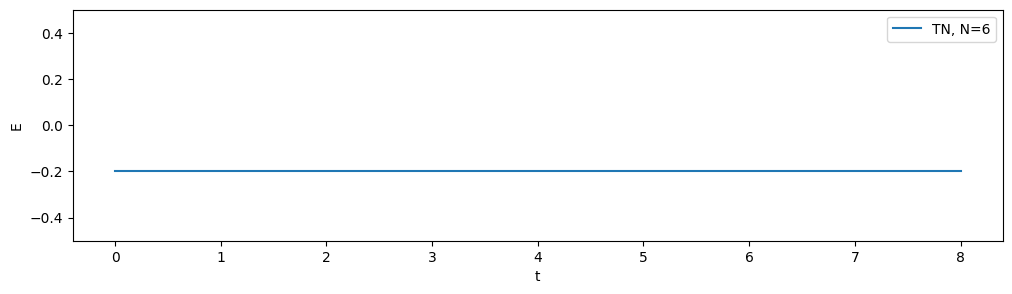

In [10]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(E_list), label="TN, N=$(N)")
plt.ylim(-0.5, 0.5); plt.xlabel("t"); plt.ylabel("E"); plt.legend()
plt.show()

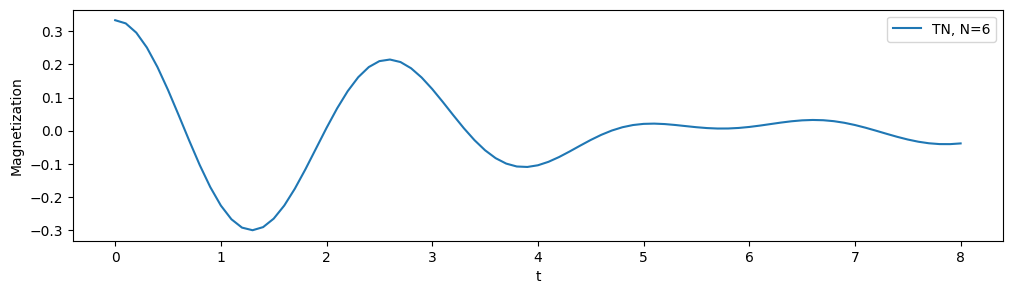

In [11]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(Mag_list), label="TN, N=$(N)")
plt.xlabel("t"); plt.ylabel("Magnetization"); plt.legend();# plt.ylim(-0.5, 0.5); 
plt.show()

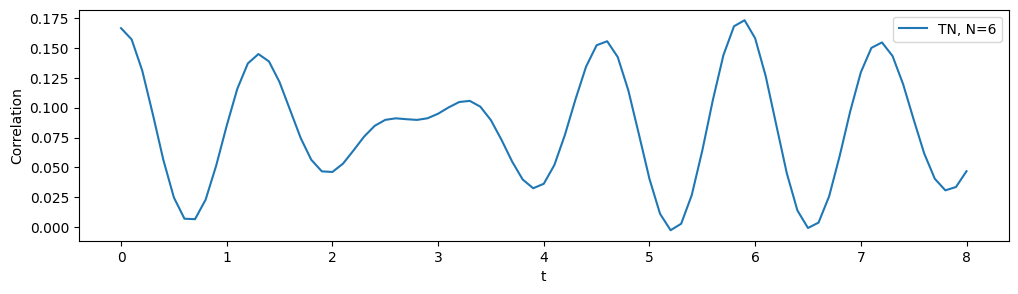

In [12]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(Corr_list), label="TN, N=$(N)")
plt.xlabel("t"); plt.ylabel("Correlation"); plt.legend();# plt.ylim(-0.5, 0.5); 
plt.show()

In [13]:
tdvp_E_list, tdvp_Mag_list, tdvp_Corr_list = E_list, Mag_list, Corr_list;

## 2. TEBD 
using second order trotter method

In [14]:
function make_tebd_gates(sites, J, h, alpha, dt)
    
    N = length(sites)
    gates = ITensor[]

    for j in 1:N-1
        s1 = sites[j]
        s2 = sites[j+1]
        hj = - J * op("Z", s1) * op("Z", s2) 
        hj = hj - h * sin(alpha) * op("Z", s1) * op("Id", s2) 
        hj = hj - h * cos(alpha) * op("X", s1) * op("Id", s2)
        Gj = exp(-im * dt / 2 * hj)
        push!(gates, Gj)
    end

    hN = - h*sin(alpha) * op("Z", sites[N]) - h*cos(alpha) * op("X", sites[N])
    GN = exp(-im * dt / 2 * hN)
    push!(gates, GN)

    append!(gates, reverse(gates))

    
    # Include gates in reverse order too for second order trotterization (with dt=1/2 of before)
    # # (N,N-1),(N-1,N-2),...
    # append!(gates, reverse(gates))

    return gates
end

function apply_tebd_step(psi, gates; cutoff=1e-12)
    psi = apply(gates, psi; cutoff)
    psi = normalize!(psi)
    return psi
end


apply_tebd_step (generic function with 1 method)

In [15]:
N = 6
J = 0.2
h = 1.2
alpha = 0

sites = siteinds("S=1/2", N)

H_mpo = Hamiltonian(N=N, J=J, h=h, alpha=alpha);

H = MPO(H_mpo, sites);

Mag = MPO(Magnetization(N=N), sites);

Corr = MPO(Correlation(N=N), sites);

In [16]:
state_list0 = ["Dn", "Up", "Up", "Up", "Up", "Dn"]
psi0 = MPS(sites, state_list0)
# psi0 = randomMPS(sites, 2)

MPS
[1] ((dim=2|id=204|"S=1/2,Site,n=1"), (dim=1|id=941|"Link,l=1"))
[2] ((dim=1|id=941|"Link,l=1"), (dim=2|id=91|"S=1/2,Site,n=2"), (dim=1|id=406|"Link,l=2"))
[3] ((dim=1|id=406|"Link,l=2"), (dim=2|id=316|"S=1/2,Site,n=3"), (dim=1|id=98|"Link,l=3"))
[4] ((dim=1|id=98|"Link,l=3"), (dim=2|id=601|"S=1/2,Site,n=4"), (dim=1|id=385|"Link,l=4"))
[5] ((dim=1|id=385|"Link,l=4"), (dim=2|id=267|"S=1/2,Site,n=5"), (dim=1|id=283|"Link,l=5"))
[6] ((dim=1|id=283|"Link,l=5"), (dim=2|id=743|"S=1/2,Site,n=6"))


In [17]:
println("Initial energy = ", inner(psi0', H, psi0))

Initial energy = -0.2


In [18]:
maxdim = 50
total_time = 8
dt = 0.1
timesteps = convert(Int64, total_time / dt)    

println("total_time = ", total_time)
println("dt         = ", dt)
println("timesteps  = ", timesteps)
println("maxdim     = ", maxdim)    

gates = make_tebd_gates(sites, J, h, alpha, dt);

total_time = 8
dt         = 0.1
timesteps  = 80
maxdim     = 50


In [19]:
apply_tebd_step(psi0, gates)

MPS
[1] ((dim=2|id=204|"S=1/2,Site,n=1"), (dim=2|id=437|"Link,n=1"))
[2] ((dim=2|id=437|"Link,n=1"), (dim=2|id=91|"S=1/2,Site,n=2"), (dim=2|id=911|"Link,n=1"))
[3] ((dim=2|id=316|"S=1/2,Site,n=3"), (dim=2|id=894|"Link,n=1"), (dim=2|id=911|"Link,n=1"))
[4] ((dim=2|id=601|"S=1/2,Site,n=4"), (dim=2|id=692|"Link,n=1"), (dim=2|id=894|"Link,n=1"))
[5] ((dim=2|id=267|"S=1/2,Site,n=5"), (dim=2|id=504|"Link,n=1"), (dim=2|id=692|"Link,n=1"))
[6] ((dim=2|id=743|"S=1/2,Site,n=6"), (dim=2|id=504|"Link,n=1"))


In [20]:


time_list = []
overlap_list = []
Mag_list = []
Corr_list = []
E_list = []

psi = psi0

for n in 0:timesteps
    
    t = n * dt 
    
    evoT = (n == 0) ? 0 : -1im*dt

    println("step = ", n, ", time = ", round(t, digits=2), " ")

    # Use global to modify the global variable
    if t != 0
        global psi = apply_tebd_step(psi, gates)
    end

    E_val = inner(psi', H, psi)
    Mag_val = inner(psi', Mag, psi)
    Corr_val = inner(psi', Corr, psi)
    
    append!(time_list, t)
    append!(E_list, E_val) 
    append!(Mag_list, Mag_val) 
    append!(Corr_list, Corr_val) 
    append!(overlap_list, inner(psi0, psi)) 


    
end

step = 0, time = 0.0 
step = 1, time = 0.1 
step = 2, time = 0.2 
step = 3, time = 0.3 
step = 4, time = 0.4 
step = 5, time = 0.5 
step = 6, time = 0.6 
step = 7, time = 0.7 
step = 8, time = 0.8 
step = 9, time = 0.9 
step = 10, time = 1.0 
step = 11, time = 1.1 
step = 12, time = 1.2 
step = 13, time = 1.3 
step = 14, time = 1.4 
step = 15, time = 1.5 
step = 16, time = 1.6 
step = 17, time = 1.7 
step = 18, time = 1.8 
step = 19, time = 1.9 
step = 20, time = 2.0 
step = 21, time = 2.1 
step = 22, time = 2.2 
step = 23, time = 2.3 
step = 24, time = 2.4 
step = 25, time = 2.5 
step = 26, time = 2.6 
step = 27, time = 2.7 
step = 28, time = 2.8 
step = 29, time = 2.9 
step = 30, time = 3.0 
step = 31, time = 3.1 
step = 32, time = 3.2 
step = 33, time = 3.3 
step = 34, time = 3.4 
step = 35, time = 3.5 
step = 36, time = 3.6 
step = 37, time = 3.7 
step = 38, time = 3.8 
step = 39, time = 3.9 
step = 40, time = 4.0 
step = 41, time = 4.1 
step = 42, time = 4.2 
step = 43, time = 4.3

In [21]:
tebd_E_list, tebd_Mag_list, tebd_Corr_list = E_list, Mag_list, Corr_list;

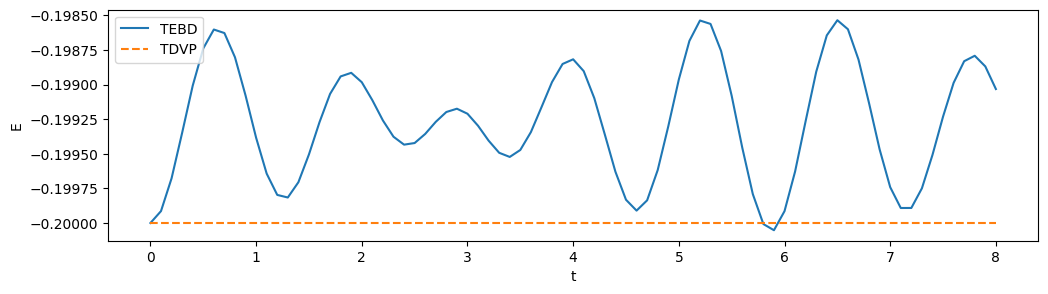

In [22]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(tebd_E_list), "-", label="TEBD")
plt.plot(time_list, real(tdvp_E_list), "--", label="TDVP")
plt.xlabel("t"); plt.ylabel("E"); plt.legend()
plt.show()

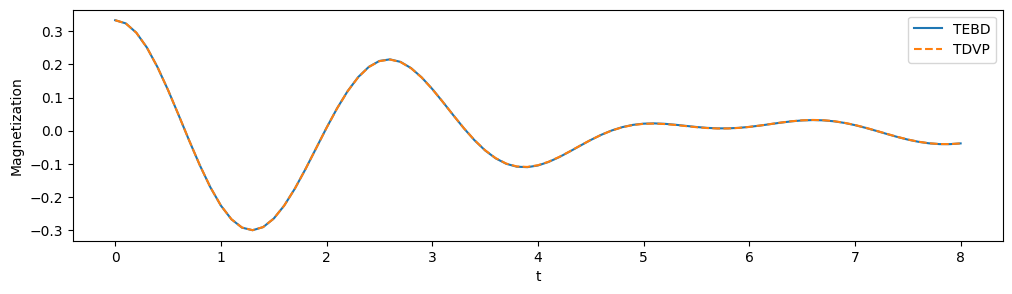

In [23]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(tebd_Mag_list), "-", label="TEBD")
plt.plot(time_list, real(tdvp_Mag_list), "--", label="TDVP")
plt.xlabel("t"); plt.ylabel("Magnetization"); plt.legend();
plt.show()

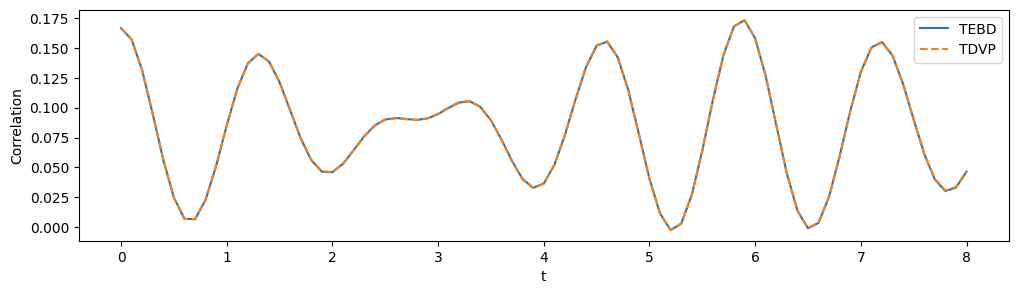

In [24]:
plt.figure(figsize=(12,3))
plt.plot(time_list, real(tebd_Corr_list), "-", label="TEBD")
plt.plot(time_list, real(tdvp_Corr_list), "--", label="TDVP")
plt.xlabel("t"); plt.ylabel("Correlation"); plt.legend();
plt.show()

## Some exercise

Consider a quenched time evolution where the initial state is the ground state of the Hamiltonian with $h \ll J$ and at $t=0$ the system is applied by a quenched Hamiltonian with $h > J$. You may imagine this is like we turn on the background field at $t=0$.

1. How do you prepare the initial state?
2. What happens to the order parameter, such as $M_z = \frac{1}{N}\sum_i \langle \sigma_i^Z \rangle$, $M_x = \frac{1}{N}\sum_i \langle \sigma_i^Z \rangle$, $M_z^2 = \frac{1}{N^2}\sum_{i,j} \langle \sigma_i^Z \sigma_j^Z \rangle$
3. How does the correlation $C_r(i) = \langle \sigma_i^Z \sigma_{i+r}^Z \rangle$ look like at different distance $r$? You may also plot the expectation $C(r, t)$ as 2D heat map.
4. How does the overlap of the states $\langle \psi_0 | \psi(t)\rangle$ look like?
5. Try scale up the problem.